In [1]:


import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models



Welcome to JupyROOT 6.20/06


In [11]:
canv = ROOT.TCanvas("canv","canv",900,450)
rfile = ROOT.TFile("new.root","READ")
ds = rfile["tree"]

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


7000


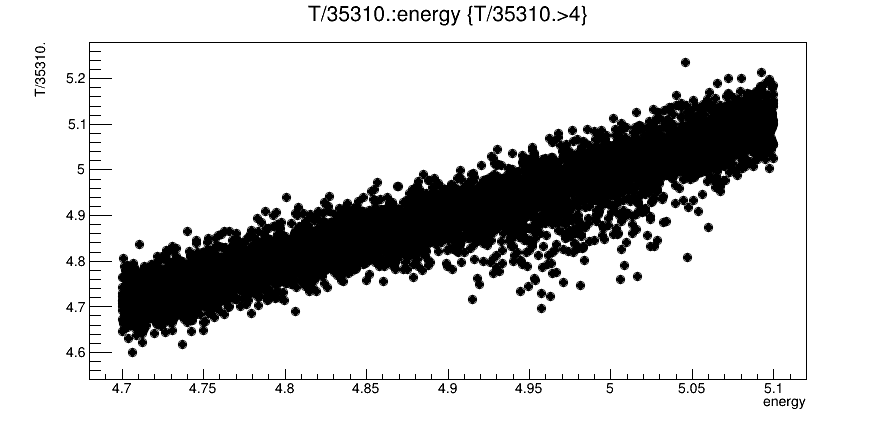

In [16]:
ds.draw("T/35310.:energy","T/35310.>4")
print(ds.GetEntries())
canv.Draw()

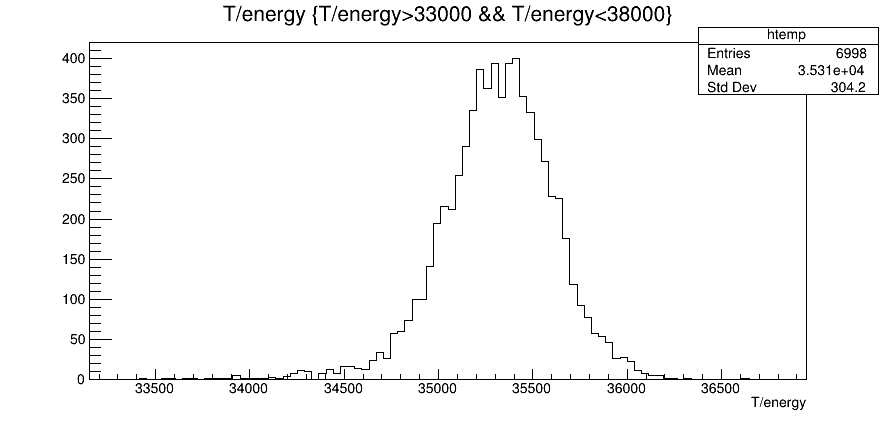

In [17]:
ds.Draw("T/energy","T/energy>33000 && T/energy<38000")
canv.Draw()

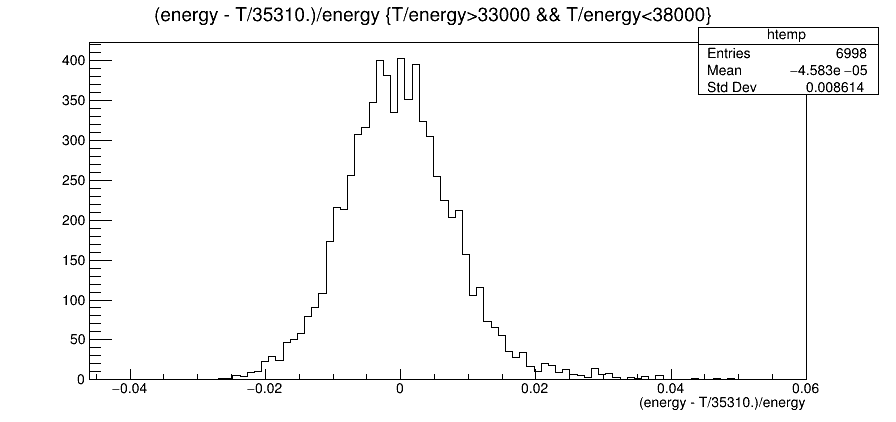

In [18]:
ds.Draw("(energy - T/35310.)/energy","T/energy>33000 && T/energy<38000")
canv.Draw()

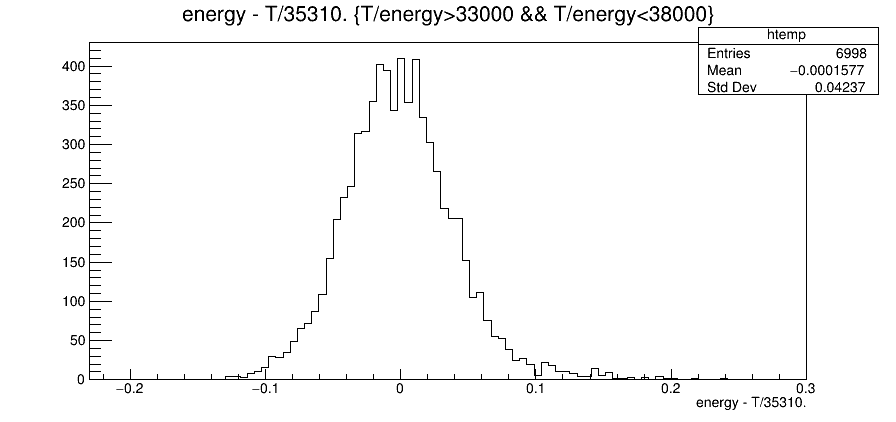

In [20]:
ds.Draw("energy - T/35310.","T/energy>33000 && T/energy<38000")
canv.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3 (Potential memory leak).


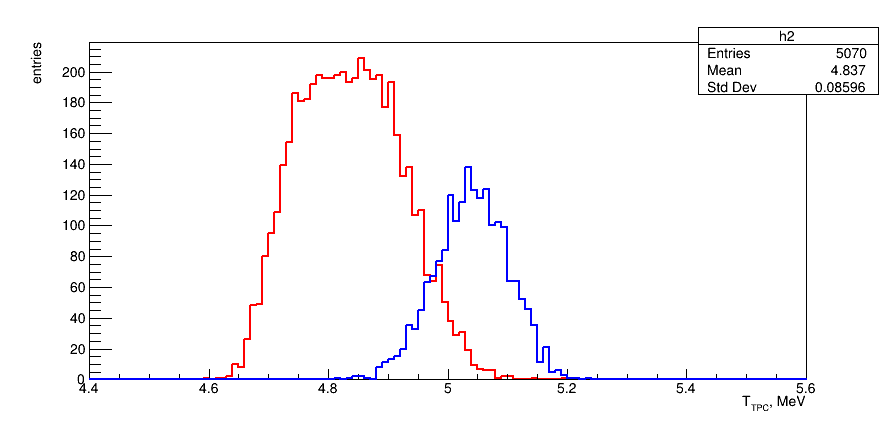

In [22]:
h2 = ROOT.TH1F("h2",";T_{TPC}, MeV;entries",120,4.4,5.6)
h2.SetLineColor(2)
h2.SetLineWidth(2)
h3 = ROOT.TH1F("h3",";T_{TPC}, MeV;entries",120,4.4,5.6)
h3.SetLineColor(4)
h3.SetLineWidth(2)
ds.Draw("(T/35310.)>>h2","energy3<100")
ds.Draw("(T/35310.)>>h3","energy3>100")
h2.Draw("hist")
h3.Draw("hist same")
canv.Draw()

( 4.97752 +- 0.00153169 )
 FCN=12.775 FROM MIGRAD    STATUS=CONVERGED      99 CALLS         100 TOTAL
                     EDM=3.54262e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.97752e+00   1.53169e-03   2.72781e-06  -1.16816e-01
   2  p1          -1.42759e+01   6.19174e-01   1.10254e-03   3.76549e-04


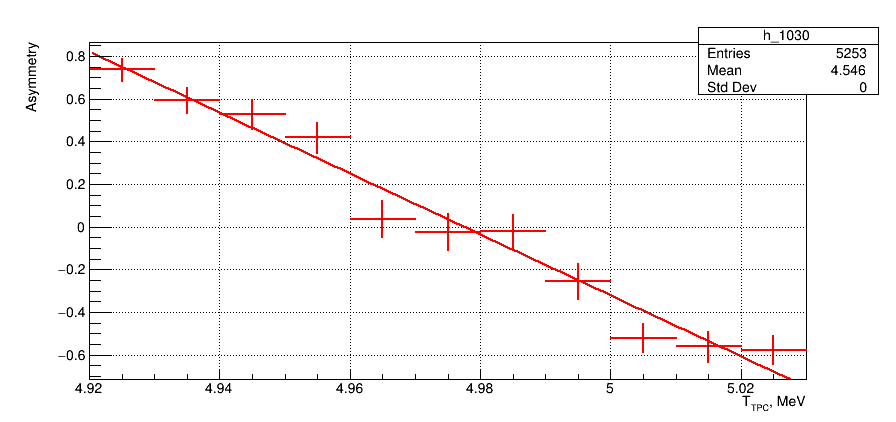

In [36]:
ha = h2.asym(h3)
ha.GetXaxis().SetRangeUser(4.925,5.025)
ha.GetYaxis().SetTitle("Asymmetry")
fa = ROOT.TF1("fa","(x-[0])*[1]",4.925,5.025)
fa.SetParameter(0,4.97)
ha.Fit(fa)
ha.Draw()
ROOT.gPad.SetGridx()
ROOT.gPad.SetGridy()
T23 = VE(fa.GetParameter(0),fa.GetParError(0)**2)
print(T23)
canv.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h2t (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3t (Potential memory leak).


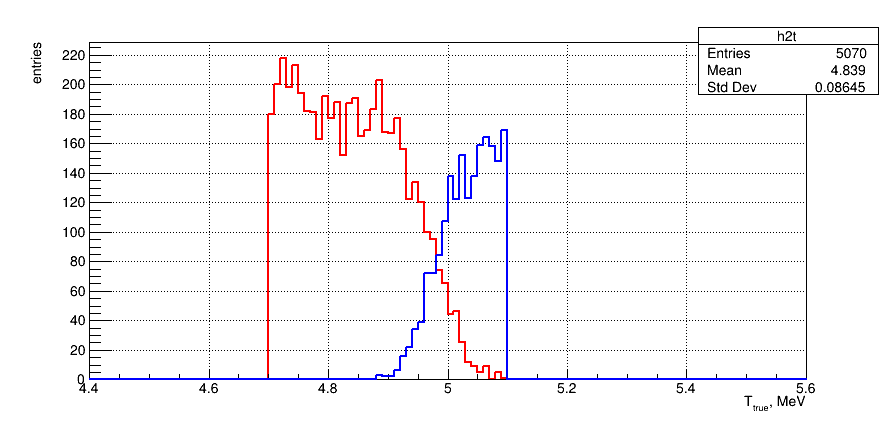

In [37]:
h2t = ROOT.TH1F("h2t",";T_{true}, MeV;entries",120,4.4,5.6)
h2t.SetLineColor(2)
h2t.SetLineWidth(2)
h3t = ROOT.TH1F("h3t",";T_{true}, MeV;entries",120,4.4,5.6)
h3t.SetLineColor(4)
h3t.SetLineWidth(2)
ds.Draw("energy>>h2t","energy3<100")
ds.Draw("energy>>h3t","energy3>100")
h2t.Draw("hist")
h3t.Draw("hist same")
canv.Draw()

( 4.97987 +- 0.00125264 )
 FCN=12.1544 FROM MIGRAD    STATUS=CONVERGED     100 CALLS         101 TOTAL
                     EDM=5.26877e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.97987e+00   1.25264e-03   2.37459e-06  -1.15408e-01
   2  p1          -1.56094e+01   5.28895e-01   9.09756e-04   6.19025e-04


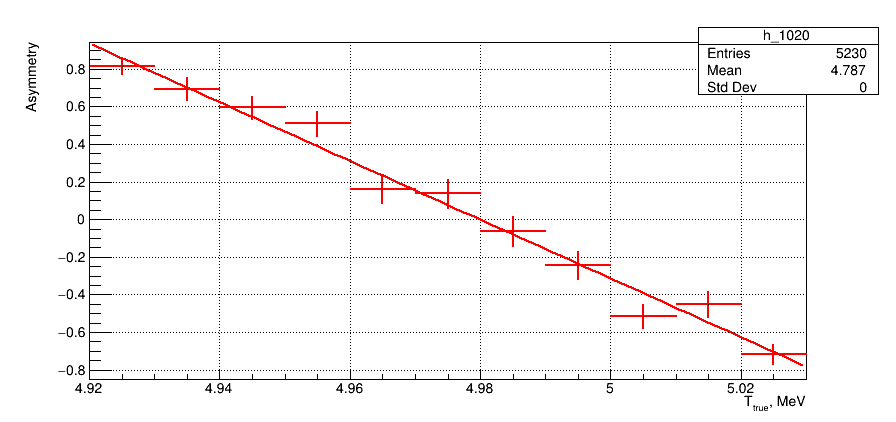

In [38]:
hat = h2t.asym(h3t)
hat.GetXaxis().SetRangeUser(4.925,5.025)
hat.GetYaxis().SetTitle("Asymmetry")
fat = ROOT.TF1("fa","(x-[0])*[1]",4.925,5.025)
fat.SetParameter(0,4.97)
hat.Fit(fat)
hat.Draw()
ROOT.gPad.SetGridx()
ROOT.gPad.SetGridy()
T23t = VE(fat.GetParameter(0),fat.GetParError(0)**2)
print(T23t)
canv.Draw()

In [52]:
print("True T23 (7000 ev) = " + str(T23t) + "\t\t" + str(1e4*T23t.prec().value() ) )
print("TPC  T23 (7000 ev) = " + str(T23 ) + "\t\t" + str(1e4*T23 .prec().value() ) )
print( " (True - TPC)  : " + str( (T23.value()-T23t.value())*1000  ) + " keV" )
print( " Deviation     : " + str((T23.value()-T23t.value())/T23.error()) + " sigma")

True T23 (7000 ev) = ( 4.97987 +- 0.00125264 )		2.515407304277576
TPC  T23 (7000 ev) = ( 4.97752 +- 0.00153169 )		3.0772108968704406
 (True - TPC)  : -2.3548826337771445 keV
 Deviztion     : -1.537443856486247 sigma



****************************************
Minimizer is Linear / Migrad
Chi2                      =      23.7259
NDf                       =           38
p0                        =     -68.4867   +/-   197.256     
p1                        =      20.3903   +/-   39.6119     


Warning in <TROOT::Append>: Replacing existing TH1: hT (Potential memory leak).


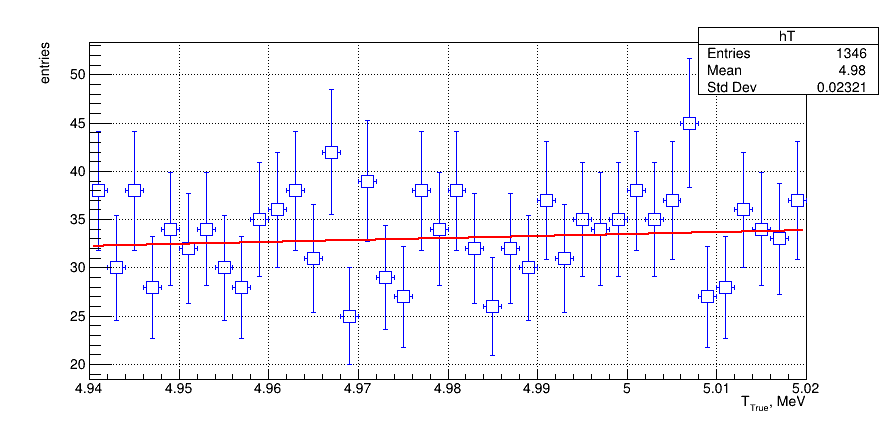

In [58]:
hT = ROOT.TH1F("hT",";T_{True}, MeV;entries",40,4.980-0.04,4.980+0.04)
ds.draw("energy>>hT","energy>(4.980-0.04) && energy<(4.980+0.04)")
hT.blue()
hT.Draw("e1")
hT.Fit("pol1")
canv.Draw()